### sklearn.preprocessing.PolynomialFeatures
---
class sklearn.preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)  

***Parameters***:	
- **degree** : *integer*  
The degree of the polynomial features. Default = 2.

- **interaction_only** : *boolean, default = False*  
If true, only interaction features are produced: features that are products of at most degree distinct input features (so not x[1] ** 2, x[0] * x[2] ** 3, etc.).  
- **include_bias** : *boolean*  
If True (default), then include a bias column, the feature in which all polynomial powers are zero (i.e. a column of ones - acts as an intercept term in a linear model).  

***Attributes***:	
- **powers_** : *array, shape (n_output_features, n_input_features)*  
powers_[i, j] is the exponent of the jth input in the ith output.

- **n_input_features_** : *int*  
The total number of input features.

- **n_output_features_** : *int*  
The total number of polynomial output features. The number of output features is computed by iterating over all suitably sized combinations of input features.

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [12]:
x1 = np.linspace(1,6,6).reshape(-1,1)
x1

array([[1.],
       [2.],
       [3.],
       [4.],
       [5.],
       [6.]])

In [23]:
for i in range(1, 4):
    poly = PolynomialFeatures(degree=i)
    x = poly.fit_transform(x1)
    x2 = poly.transform(x1)
    print(poly.get_params(), '\n', poly.get_feature_names(), '\n', x, '\n', x2)

{'degree': 1, 'include_bias': True, 'interaction_only': False} 
 ['1', 'x0'] 
 [[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]] 
 [[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]]
{'degree': 2, 'include_bias': True, 'interaction_only': False} 
 ['1', 'x0', 'x0^2'] 
 [[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]
 [ 1.  6. 36.]] 
 [[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]
 [ 1.  6. 36.]]
{'degree': 3, 'include_bias': True, 'interaction_only': False} 
 ['1', 'x0', 'x0^2', 'x0^3'] 
 [[  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   3.   9.  27.]
 [  1.   4.  16.  64.]
 [  1.   5.  25. 125.]
 [  1.   6.  36. 216.]] 
 [[  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   3.   9.  27.]
 [  1.   4.  16.  64.]
 [  1.   5.  25. 125.]
 [  1.   6.  36. 216.]]


In [73]:
def getdata(N=6, p=1):
    np.random.seed(0)
    x = np.linspace(0, 6, N)
    x_pred = np.linspace(0, 6, N*20).reshape(-1,1)
    y = x ** 2 - 4 * x - 3 + np.random.randn(N)
    x.shape = -1, 1
    y.shape = -1, 1
    # if p != 1:
    #     #     x = x1
    #     #     for i in range(p, p + 1):
    #     #         x = np.concatenate((x, x1 ** i), axis=1)
    #     # else:
    #     #     x = x1
    return x, x_pred, y, N, p

In [110]:
def get_data(N=100, p=1):
    np.random.seed(0)
    x = np.random.uniform(0, 6, size=N).reshape(-1, 1)
    x_pred = np.random.uniform(0, 6, size=N*20).reshape(-1, 1)
    x = np.sort(x, axis=0)
    x_pred = np.sort(x_pred, axis=0)
    y = x ** 2 - 4 * x - 3 + np.random.randn(N).reshape(-1, 1)
    y.shape = -1, 1
    return x, x_pred, y, N, p

In [111]:
x,x_pred, y, N, p = get_data(100, 2)

In [112]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
import matplotlib as mpl

the degree:1
['1', 'x0']
the coef_:[[0.         1.82744241]]
intercept_:[-8.42634323]

the degree:2
['1', 'x0', 'x0^2']
the coef_:[[ 0.         -3.87243564  0.98402595]]
intercept_:[-3.12026073]

the degree:3
['1', 'x0', 'x0^2', 'x0^3']
the coef_:[[ 0.         -4.14416387  1.09662526 -0.01240906]]
intercept_:[-2.98878475]

the degree:4
['1', 'x0', 'x0^2', 'x0^3', 'x0^4']
the coef_:[[ 0.         -3.30520232  0.46271343  0.15345487 -0.01390794]]
intercept_:[-3.24431675]

the degree:5
['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5']
the coef_:[[ 0.00000000e+00 -3.35770677e+00  5.25657468e-01  1.24865082e-01
  -8.45239378e-03 -3.68871163e-04]]
intercept_:[-3.23361599]

the degree:6
['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6']
the coef_:[[ 0.         -5.5681177   4.42853505 -2.5801758   0.86098755 -0.13071169
   0.00737151]]
intercept_:[-2.93130514]

the degree:1
['1', 'x0']
the coef_:[[0.         1.82135548]]
intercept_:[-8.40907606]

the degree:2
['1', 'x0', 'x0^2']
the coef_:[[ 0.     

c:\program files\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on t

the degree:4
['1', 'x0', 'x0^2', 'x0^3', 'x0^4']
the coef_:[ 0.         -0.         -0.         -0.          0.01218266]
intercept_:-6.041339574401116

the degree:5
['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5']
the coef_:[ 0.         -1.40443019 -0.18036812  0.15970113  0.00698009 -0.00198547]
intercept_:-4.383660731720619

the degree:6
['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6']
the coef_:[ 0.00000000e+00 -1.06815062e+00 -3.07066728e-01  1.46774555e-01
  1.20517873e-02 -6.85050499e-04 -2.46399884e-04]
intercept_:-4.520850980590007

the degree:1
['1', 'x0']
the coef_:[0.         1.42262468]
intercept_:-7.277971268576717

the degree:2
['1', 'x0', 'x0^2']
the coef_:[ 0.         -2.86725684  0.82169367]
intercept_:-4.179653137845197

the degree:3
['1', 'x0', 'x0^2', 'x0^3']
the coef_:[ 0.         -0.29424757 -0.29827422  0.12765643]
intercept_:-5.325133338403404

the degree:4
['1', 'x0', 'x0^2', 'x0^3', 'x0^4']
the coef_:[ 0.         -0.         -0.035422   -0.          0.01323968]


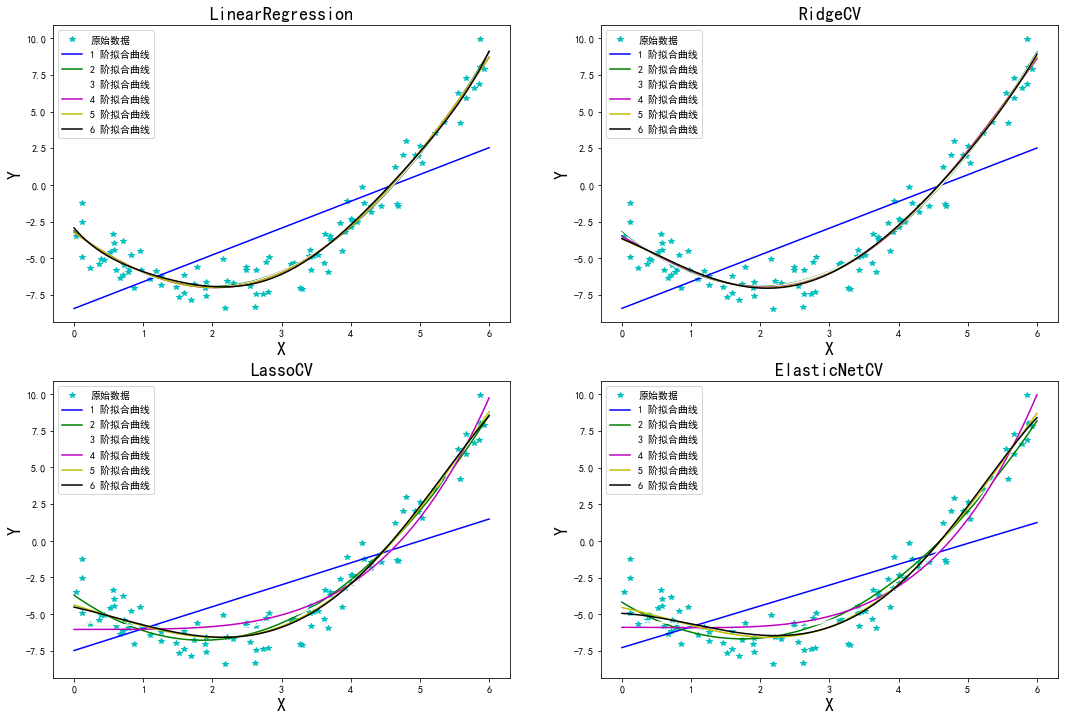

In [113]:
mpl.rcParams['font.sans-serif'] = ['simHei']
mpl.rcParams['axes.unicode_minus'] = False
models = [LinearRegression(),
          RidgeCV(alphas=[0.1, 0.2, 0.3,0.5, 1]), 
          LassoCV(alphas=[0.1, 0.2, 0.3,0.5, 1]), 
          ElasticNetCV(alphas=[0.1, 0.2, 0.3,0.5, 1])]
models_name = ['LinearRegression', 'RidgeCV', 'LassoCV', 'ElasticNetCV']
clrs = ['r', 'b', 'g', 'w', 'm', 'y', 'k']  # 颜色

plt.figure(figsize=(18, 12), facecolor='w')
plt.axis('off')
for c, model in enumerate(models):
    regr = models[c]
    plt.subplot(2,2,c+1)
    plt.title(models_name[c], fontsize=18)
    plt.plot(x, y, 'c*', label='原始数据')
    plt.xlabel('X', fontsize=18)
    plt.ylabel('Y', fontsize=18)
    for i in range(1, 7):
        poly = PolynomialFeatures(degree=i)
        x1 = poly.fit_transform(x)
        regr.fit(x1, y)
        print('the degree:{}\n{}\nthe coef_:{}\nintercept_:{}\n'.format(i, poly.get_feature_names(), regr.coef_, regr.intercept_))
        pred = regr.predict(poly.fit_transform(x_pred))
        label = '%d 阶拟合曲线' % i
        plt.plot(x_pred, pred, color=clrs[i], label=label)
    plt.legend(loc='best')
    
plt.show()

the degree:1
['1', 'x0']
the coef_:[[-8.42634323  1.82744241]]

the degree:2
['1', 'x0', 'x0^2']
the coef_:[[-3.12026073 -3.87243564  0.98402595]]

the degree:3
['1', 'x0', 'x0^2', 'x0^3']
the coef_:[[-2.98878475 -4.14416387  1.09662526 -0.01240906]]

the degree:4
['1', 'x0', 'x0^2', 'x0^3', 'x0^4']
the coef_:[[-3.24431675 -3.30520232  0.46271343  0.15345487 -0.01390794]]

the degree:5
['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5']
the coef_:[[-3.23361599e+00 -3.35770677e+00  5.25657468e-01  1.24865082e-01
  -8.45239378e-03 -3.68871163e-04]]

the degree:6
['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6']
the coef_:[[-2.93130514 -5.5681177   4.42853505 -2.5801758   0.86098755 -0.13071169
   0.00737151]]

the degree:1
['1', 'x0']
the coef_:[[-8.11057404  1.74472015]]

the degree:2
['1', 'x0', 'x0^2']
the coef_:[[-3.11717014 -3.86900409  0.98314656]]

the degree:3
['1', 'x0', 'x0^2', 'x0^3']
the coef_:[[-3.03000139 -4.05118264  1.05899695 -0.00838269]]

the degree:4
['1', 'x0', 'x0^2', 'x0

c:\program files\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want

the degree:6
['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6']
the coef_:[-3.20859640e+00 -2.21619402e+00 -0.00000000e+00  1.23053296e-01
  1.13177654e-02 -6.32533574e-04 -2.43360676e-04]

the degree:1
['1', 'x0']
the coef_:[-6.86053895  1.41415038]

the degree:2
['1', 'x0', 'x0^2']
the coef_:[-2.9090899  -3.67043226  0.93068662]

the degree:3
['1', 'x0', 'x0^2', 'x0^3']
the coef_:[-1.29478158 -1.13204504 -0.60758011  0.18743701]

the degree:4
['1', 'x0', 'x0^2', 'x0^3', 'x0^4']
the coef_:[-3.08393004 -2.47787269  0.06494916  0.1898067  -0.01251732]

the degree:5
['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5']
the coef_:[-2.3345865  -1.84261805 -0.53983082  0.25625157  0.0083897  -0.00318089]

the degree:6
['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6']
the coef_:[-1.15370350e+00 -9.47733441e-01 -9.13102112e-01  1.15822719e-01
  5.09087560e-02 -1.16125484e-03 -7.31899396e-04]



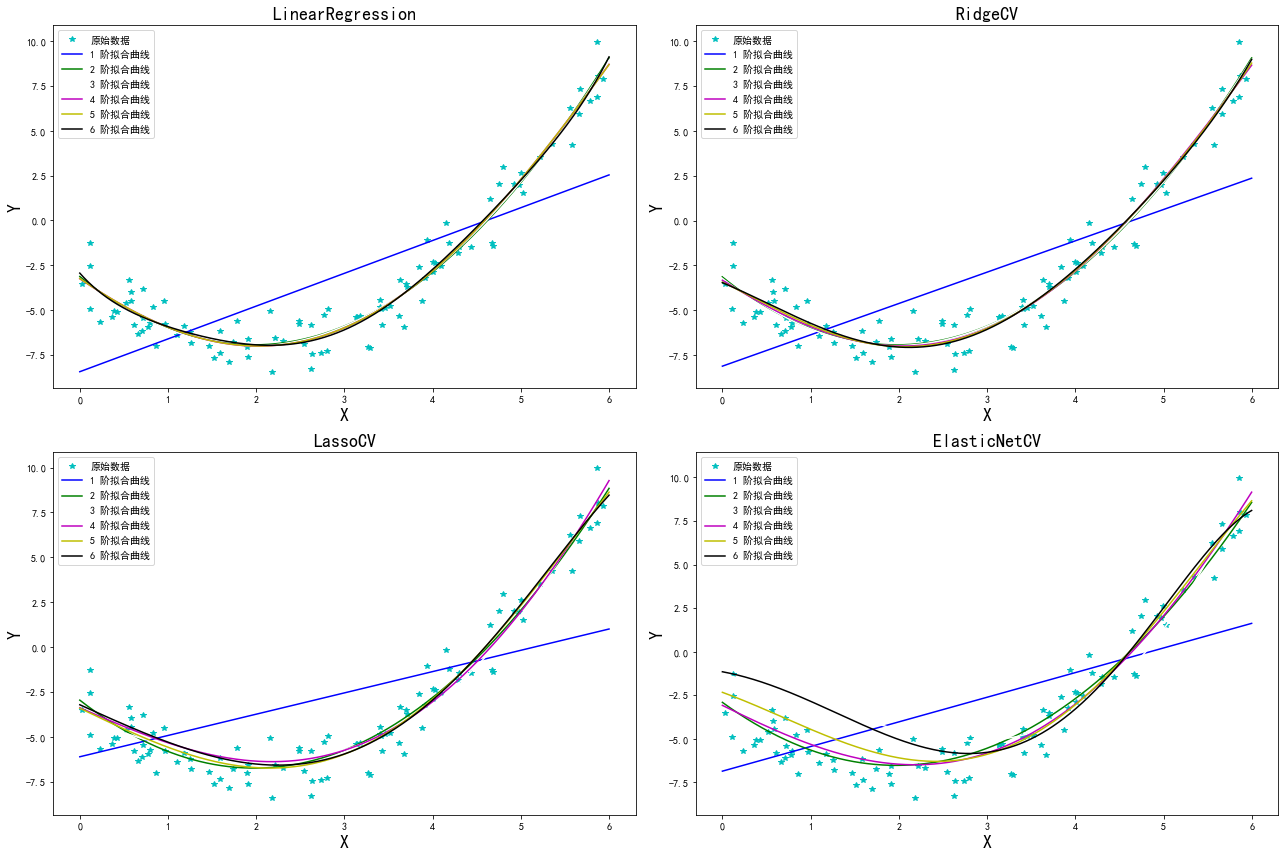

In [114]:
x, x_pred, y, N, p = get_data(100, 2)

mpl.rcParams['font.sans-serif'] = ['simHei']
mpl.rcParams['axes.unicode_minus'] = False
models = [LinearRegression(fit_intercept=False),
              RidgeCV(alphas=[0.1, 0.2, 0.3, 0.5, 1], cv=3, fit_intercept=False),
              LassoCV(alphas=[0.1, 0.2, 0.3, 0.5, 1], cv=3, fit_intercept=False),
              ElasticNetCV(alphas=[0.1, 0.2, 0.3, 0.5, 1], cv=3, fit_intercept=False)]
models_name = ['LinearRegression', 'RidgeCV', 'LassoCV', 'ElasticNetCV']
clrs = ['r', 'b', 'g', 'w', 'm', 'y', 'k']  # 颜色

plt.figure(figsize=(18, 12), facecolor='w')
plt.axis('off')
for c, model in enumerate(models):
    regr = models[c]
    plt.subplot(2, 2, c + 1)
    plt.title(models_name[c], fontsize=18)
    plt.plot(x, y, 'c*', label='原始数据')
    plt.xlabel('X', fontsize=18)
    plt.ylabel('Y', fontsize=18)
    for i in range(1, 7):
        poly = PolynomialFeatures(degree=i)
        x1 = poly.fit_transform(x)
        regr.fit(x1, y)
        print('the degree:{}\n{}\nthe coef_:{}\n'.format(i, poly.get_feature_names(), regr.coef_))
        pred = regr.predict(poly.fit_transform(x_pred))
        label = '%d 阶拟合曲线' % i
        plt.plot(x_pred, pred, color=clrs[i], label=label)
    plt.legend(loc='best')
plt.tight_layout()
plt.show()